In [0]:
pip install git+https://github.com/pymc-devs/pymc3

  Cloning https://github.com/pymc-devs/pymc3 to /tmp/pip-req-build-m9i95hnn
  Running command git clone -q https://github.com/pymc-devs/pymc3 /tmp/pip-req-build-m9i95hnn
ERROR: Operation cancelled by user


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns              
%matplotlib inline
sns.set()
from subprocess import check_output
import warnings                    
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import pymc3 as pm
import arviz as az
import matplotlib.lines as mlines
from collections import OrderedDict
import theano
import theano.tensor as tt
import itertools
from IPython.core.pylabtools import figsize
pd.set_option('display.max_columns', 30)
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# scipy for algorithms
import scipy
from scipy import optimize

import json
# s = json.load(open('../style/bmh_matplotlibrc.json'))
# matplotlib.rcParams.update(s)
# matplotlib.rcParams['figure.figsize'] = (10, 3)
# matplotlib.rcParams['font.size'] = 14
# matplotlib.rcParams['ytick.major.size'] = 20

# Number of samples for Markov Chain Monte Carlo
N_SAMPLES = 5000

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
retention = pd.read_csv("/content/drive/My Drive/Marketing Analytics II Project/insurance_retention.csv")

In [0]:
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')             
def annot_plot_num(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

In [0]:
df=retention.copy()
df['Response_bin'] = df['Response'].apply(lambda X : 0 if X == 'No' else 1)
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Response_bin
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


##EDA

In [0]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Response_bin                     0
dtype: int64

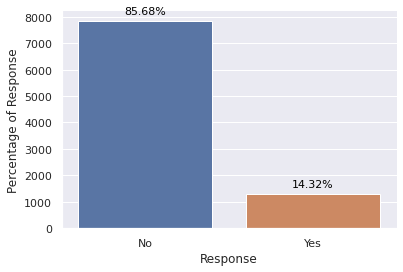

In [0]:
ax = sns.countplot('Response',data = df)
plt.ylabel('Percentage of Response')
annot_plot(ax, 0.08,1)
plt.show()

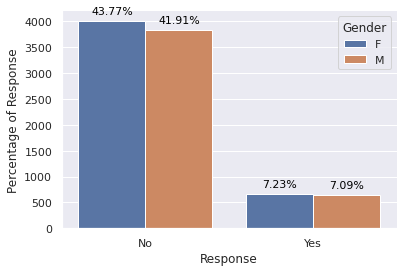

In [0]:
ax = sns.countplot('Response',hue = 'Gender' ,data = df)
plt.ylabel('Percentage of Response')
annot_plot(ax, 0.08,1)
plt.show()

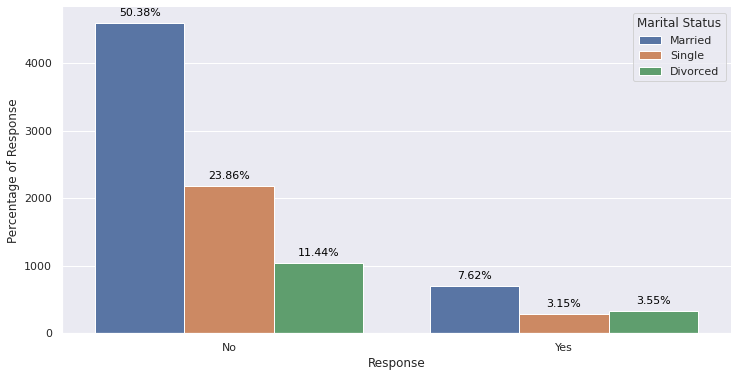

In [0]:
plt.figure(figsize=(12,6))
ax = sns.countplot('Response', hue = df['Marital Status'], data = df)
plt.ylabel('Percentage of Response')
annot_plot(ax,0.08,1)
plt.show()

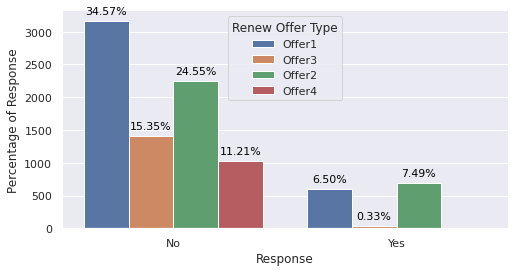

In [0]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response',hue = 'Renew Offer Type' ,data = df)
plt.ylabel('Percentage of Response')
annot_plot(ax, 0.08,1)
plt.show()

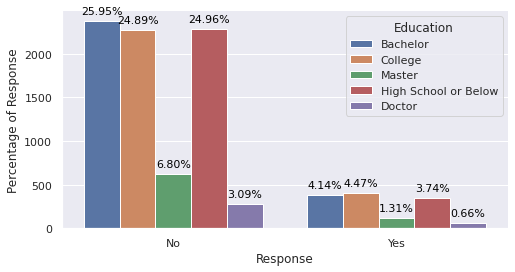

In [0]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response',hue = 'Education' ,data = df)
plt.ylabel('Percentage of Response')
annot_plot(ax, 0.08,1)
plt.show()

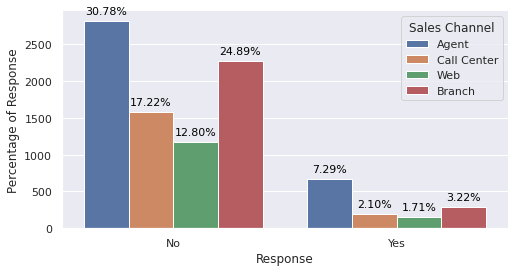

In [0]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response',hue = 'Sales Channel' ,data = df)
plt.ylabel('Percentage of Response')
annot_plot(ax, 0.08,1)
plt.show()

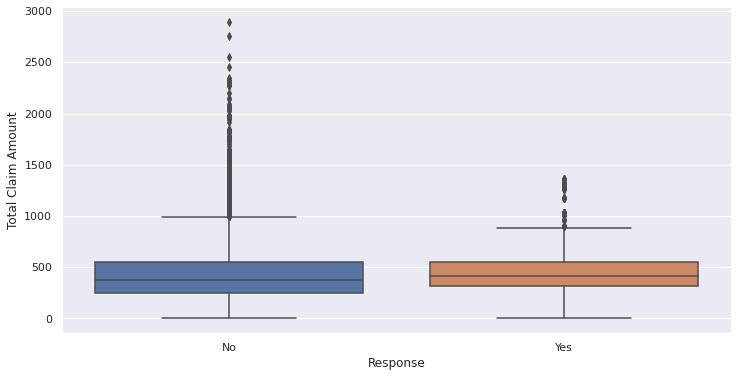

In [0]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Total Claim Amount' , x = 'Response', data = df)
plt.ylabel('Total Claim Amount')
plt.show()

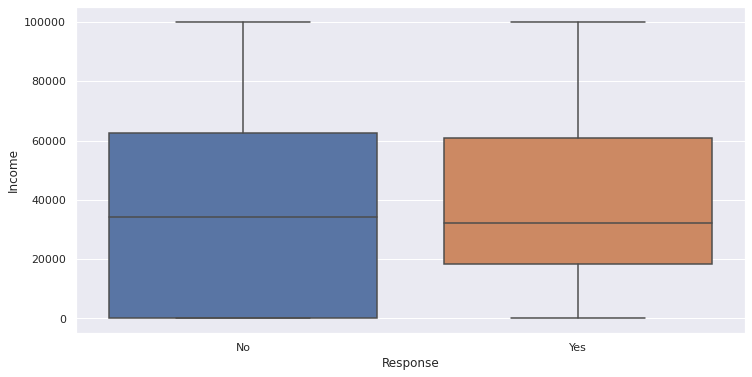

In [0]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Income' , x = 'Response', data = df)
plt.show()

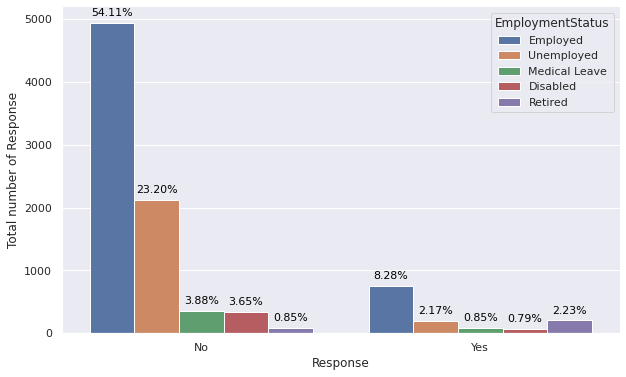

In [0]:
plt.figure(figsize=(10,6))
ax = sns.countplot('Response',hue = 'EmploymentStatus' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

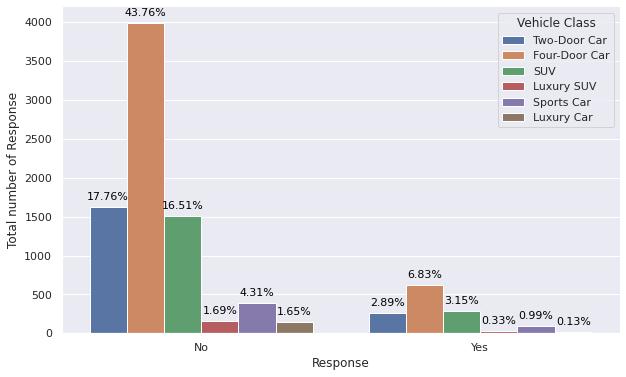

In [0]:
plt.figure(figsize=(10,6))
ax = sns.countplot('Response',hue = 'Vehicle Class' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

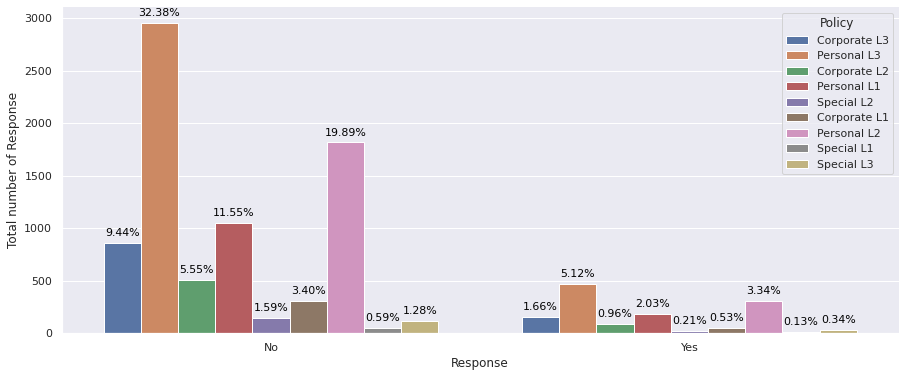

In [0]:
plt.figure(figsize=(15,6))
ax = sns.countplot('Response',hue = 'Policy' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

##**Regression Analysis with Continuous Variables Only**

In [0]:
continous_var_df = df.select_dtypes(include=['int64','float'])
continous_var_df.nunique()

Customer Lifetime Value          8041
Income                           5694
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Total Claim Amount               5106
Response_bin                        2
dtype: int64

In [0]:
continous_var_reg = sm.Logit(continous_var_df['Response_bin'], continous_var_df.drop('Response_bin', axis = 1))
continous_var_reg.fit().summary()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Response_bin   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Sun, 10 May 2020   Pseudo R-squ.:                -0.02546
Time:                        18:44:07   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

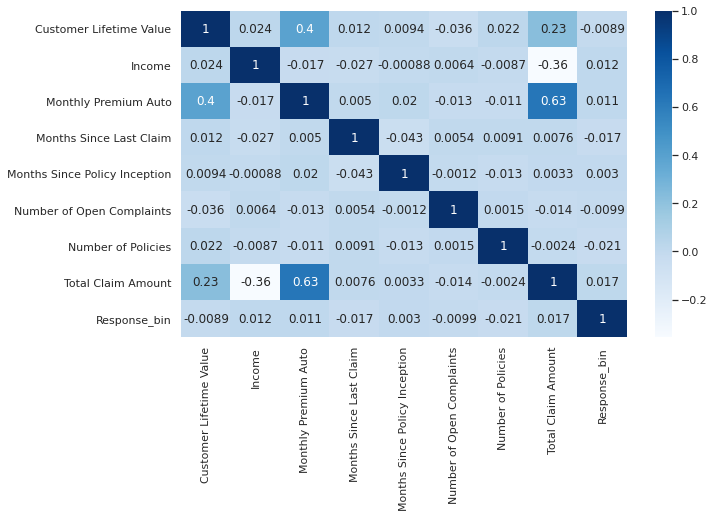

In [0]:
plt.figure(figsize=(10,6))
sns.heatmap(continous_var_df.corr(), annot = True, cmap='Blues')
plt.show()

##**Regression Analysis with Categorical Variables**

In [0]:
categorical_df = df.select_dtypes(include='object')
cat_df = categorical_df.drop(['Response','Customer','Effective To Date'], axis = 1)

In [0]:
cols = ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

In [0]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cat_df[cols]:
    cat_df[col] = lb.fit_transform(cat_df[col])

In [0]:
cat_df.head()

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,0,0,1,0,1,1,0,2,0,0,5,1
1,0,1,0,4,0,1,2,1,5,2,0,0,1
2,2,2,0,1,0,1,1,1,5,0,0,5,1
3,1,0,0,4,1,1,1,0,1,0,2,3,1
4,4,0,0,1,1,0,2,1,3,0,0,0,1


In [0]:
categorical_train = sm.Logit(continous_var_df['Response_bin'], cat_df)
categorical_train.fit().summary()

Optimization terminated successfully.
         Current function value: 0.387557
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Response_bin   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9121
Method:                           MLE   Df Model:                           12
Date:                Sun, 10 May 2020   Pseudo R-squ.:                 0.05642
Time:                        18:44:08   Log-Likelihood:                -3539.9
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 4.224e-83
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
State               -0.0256      0.023     -1.122      0.262      -0.070       0.019
Coverage            -0.0639      0.046     -1.390      0.164      -0.154       0.026
Education            0.0088      0.022      0.409      0.683      -0.033       0.051
EmploymentStatus    -0.0459      0.024     -1.951      0.051      -0.092       0.000
Gender               0.0466      0.060      0.774      0.439      -0.071       0.165
Location Code       -0.0477      0.047     -1.014      0.311      -0.140       0.045
Marital Status      -0.4643      0.047     -9.816      0.000      -0.557      -0.372
Policy Type          0.1736      0.132      1.311      0.190      -0.086       0.433
Policy              -0.0751      0.037     -2.033      0.042      -0.147      -0.003
Renew Offer Type    -0.5681      0.037    -15.226      0.000      -0.641      -0.495
Sales Channel       -0.2150      0.030     -7.148      0.000      -0.274      -0.156
Vehicle Class        0.0201      0.015      1.381      0.167      -0.008       0.049
Vehicle Size        -0.3355      0.052     -6.398      0.000      -0.438      -0.233
====================================================================================
"""

##**Regression Analysis with both Continous and Categorical Variables**

In [0]:
continous_var_df.reset_index(drop = True, inplace=True)
cat_df.reset_index(drop = True, inplace=True)

In [0]:
all_data_df = pd.concat([continous_var_df,cat_df], axis = 1)
all_data_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Response_bin,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,2763.519279,56274,69,32,5,0,1,384.811147,0,4,0,0,1,0,1,1,0,2,0,0,5,1
1,6979.535903,0,94,13,42,0,8,1131.464935,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,12887.431650,48767,108,18,38,0,2,566.472247,0,2,2,0,1,0,1,1,1,5,0,0,5,1
3,7645.861827,0,106,18,65,0,7,529.881344,0,1,0,0,4,1,1,1,0,1,0,2,3,1
4,2813.692575,43836,73,12,44,0,1,138.130879,0,4,0,0,1,1,0,2,1,3,0,0,0,1


In [0]:
total_train = sm.Logit(all_data_df['Response_bin'], all_data_df.drop(['Response_bin'], axis = 1))
total_train.fit().summary()

Optimization terminated successfully.
         Current function value: 0.384709
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Response_bin   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9113
Method:                           MLE   Df Model:                           20
Date:                Sun, 10 May 2020   Pseudo R-squ.:                 0.06336
Time:                        18:44:08   Log-Likelihood:                -3513.9
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 4.066e-88
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -1.183e-05   5.11e-06     -2.317      0.021   -2.18e-05   -1.82e-06
Income                         3.347e-06   1.39e-06      2.411      0.016    6.26e-07    6.07e-06
Monthly Premium Auto             -0.0033      0.001     -2.471      0.013      -0.006      -0.001
Months Since Last Claim          -0.0053      0.003     -1.780      0.075      -0.011       0.001
Months Since Policy Inception    -0.0019      0.001     -1.830      0.067      -0.004       0.000
Number of Open Complaints        -0.0569      0.035     -1.622      0.105      -0.126       0.012
Number of Policies               -0.0392      0.013     -3.013      0.003      -0.065      -0.014
Total Claim Amount                0.0007      0.000      4.448      0.000       0.000       0.001
State                            -0.0084      0.023     -0.357      0.721      -0.054       0.038
Coverage                         -0.0325      0.053     -0.615      0.538      -0.136       0.071
Education                         0.0235      0.022      1.068      0.285      -0.020       0.067
EmploymentStatus                 -0.0232      0.030     -0.763      0.445      -0.083       0.036
Gender                            0.0584      0.061      0.950      0.342      -0.062       0.179
Location Code                    -0.0894      0.053     -1.696      0.090      -0.193       0.014
Marital Status                   -0.4645      0.048     -9.585      0.000      -0.559      -0.370
Policy Type                       0.1085      0.135      0.806      0.420      -0.155       0.372
Policy                           -0.0335      0.039     -0.864      0.388      -0.110       0.043
Renew Offer Type                 -0.5828      0.039    -15.136      0.000      -0.658      -0.507
Sales Channel                    -0.1937      0.030     -6.354      0.000      -0.253      -0.134
Vehicle Class                     0.0287      0.015      1.897      0.058      -0.001       0.058
Vehicle Size                     -0.2837      0.055     -5.161      0.000      -0.391      -0.176
=================================================================================================
"""

##**Regression Analysis with excluding Non-significant variables**

In [0]:
all_data_df.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'Response_bin', 'State', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [0]:
significant_cols = ['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim',
                    'Months Since Policy Inception','Number of Policies','Total Claim Amount','Marital Status',
                    'Renew Offer Type','Sales Channel','Vehicle Size']
trainData = sm.Logit(all_data_df['Response_bin'], all_data_df[significant_cols])
trainData.fit().summary()

Optimization terminated successfully.
         Current function value: 0.385476
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Response_bin   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9123
Method:                           MLE   Df Model:                           10
Date:                Sun, 10 May 2020   Pseudo R-squ.:                 0.06149
Time:                        18:44:08   Log-Likelihood:                -3520.9
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 7.814e-93
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -1.129e-05   5.09e-06     -2.217      0.027   -2.13e-05   -1.31e-06
Income                         3.549e-06   1.11e-06      3.192      0.001    1.37e-06    5.73e-06
Monthly Premium Auto             -0.0033      0.001     -2.762      0.006      -0.006      -0.001
Months Since Last Claim          -0.0062      0.003     -2.102      0.036      -0.012      -0.000
Months Since Policy Inception    -0.0023      0.001     -2.238      0.025      -0.004      -0.000
Number of Policies               -0.0414      0.013     -3.226      0.001      -0.067      -0.016
Total Claim Amount                0.0006      0.000      4.148      0.000       0.000       0.001
Marital Status                   -0.4794      0.045    -10.664      0.000      -0.567      -0.391
Renew Offer Type                 -0.5793      0.038    -15.268      0.000      -0.654      -0.505
Sales Channel                    -0.1981      0.030     -6.539      0.000      -0.257      -0.139
Vehicle Size                     -0.3031      0.053     -5.690      0.000      -0.407      -0.199
=================================================================================================
"""

#Classification

In [0]:
all_data_df.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'Response_bin', 'State', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

##**Classification**

In [0]:
y = all_data_df['Response_bin']
X = all_data_df.drop('Response_bin', axis = 1)

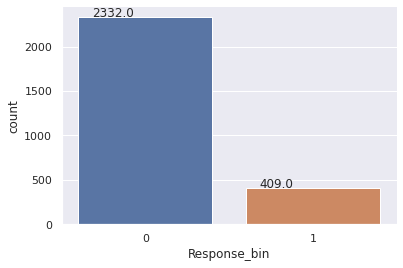

In [0]:
from sklearn.model_selection import train_test_split, cross_validate
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
ax = sns.countplot(y_test)
annot_plot_num(ax,0.08,1)

##SVC

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print(confusion_matrix(svc_pred,y_test))
print('accuracy_score:',accuracy_score(svc_pred, y_test))
print(classification_report(svc_pred, y_test))

cross_val_score_svc = cross_validate(svc, X_train, y_train,cv = 5)
# print('Cross validation train_score',cross_val_score_svc['train_score'].mean())
print('Cross validation test_score',cross_val_score_svc['test_score'].mean())

[[2332  409]
 [   0    0]]
accuracy_score: 0.8507843852608536
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      2741
           1       0.00      0.00      0.00         0

    accuracy                           0.85      2741
   macro avg       0.50      0.43      0.46      2741
weighted avg       1.00      0.85      0.92      2741

Cross validation test_score 0.85937749684625


##Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
cfm = confusion_matrix(rfc_pred,y_test)
print(cfm)
print('Accuracy score:',accuracy_score(rfc_pred, y_test))
print(classification_report(rfc_pred, y_test))

cross_val_score_rfc = cross_validate(rfc, X_train, y_train,cv = 5)

# print('Cross validation train_score',cross_val_score_rfc['train_score'].mean())
print('Cross validation test_score',cross_val_score_rfc['test_score'].mean())

[[2328   12]
 [   4  397]]
Accuracy score: 0.9941627143378329
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2340
           1       0.97      0.99      0.98       401

    accuracy                           0.99      2741
   macro avg       0.98      0.99      0.99      2741
weighted avg       0.99      0.99      0.99      2741

Cross validation test_score 0.9885815282626172


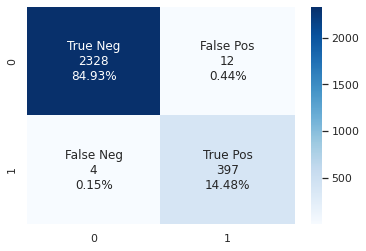

In [0]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cfm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues')

##**Feature Importance**

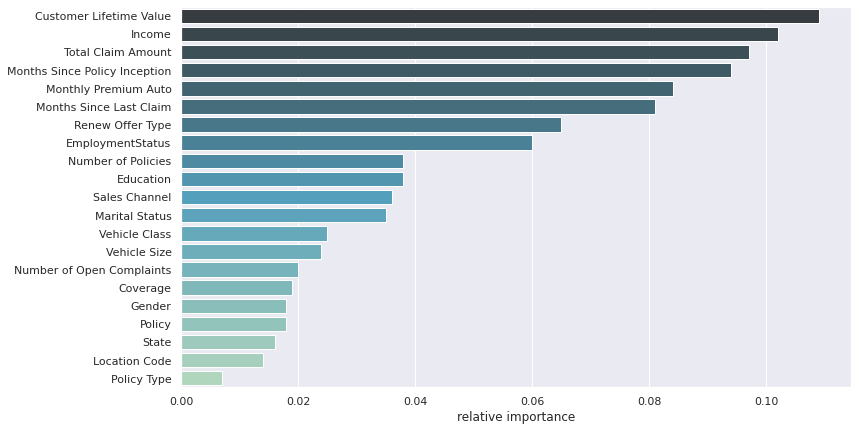

In [0]:
feature_imp = rfc.feature_importances_.round(3)
ser_rank = pd.Series(feature_imp, index=X.columns).sort_values(ascending = False)

plt.figure(figsize=(12,7))
sns.barplot(x= ser_rank.values, y = ser_rank.index, palette='GnBu_d')
plt.xlabel('relative importance')
plt.show()

## Bayesian Logistic Regression

In [0]:
all_data_df.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'Response_bin', 'State', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [0]:
outcome = all_data_df['Response_bin']
data = all_data_df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto','Months Since Last Claim', 'Months Since Policy Inception','Number of Open Complaints', 'Number of Policies', 
                    'Total Claim Amount','State', 'Coverage', 'Education', 'EmploymentStatus','Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy','Renew Offer Type', 
                    'Sales Channel', 'Vehicle Class', 'Vehicle Size']]
data['outcome'] = outcome
data.corr()['outcome'].sort_values(ascending=False)

outcome                          1.000000
Vehicle Class                    0.021225
Total Claim Amount               0.016877
Income                           0.011932
Monthly Premium Auto             0.010966
Gender                           0.004396
Months Since Policy Inception    0.002952
Location Code                    0.001729
Policy Type                      0.001110
Coverage                         0.000642
Education                        0.000285
Policy                          -0.001461
State                           -0.002473
Customer Lifetime Value         -0.008930
Number of Open Complaints       -0.009881
Months Since Last Claim         -0.016597
EmploymentStatus                -0.016703
Number of Policies              -0.020891
Vehicle Size                    -0.050691
Sales Channel                   -0.086607
Marital Status                  -0.094843
Renew Offer Type                -0.162882
Name: outcome, dtype: float64

In [0]:
all_data_df.columns = all_data_df.columns.str.replace(' ', '_')

In [0]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula('Response_bin ~ Customer_Lifetime_Value + Income + Monthly_Premium_Auto + Months_Since_Last_Claim + Months_Since_Policy_Inception + Number_of_Open_Complaints + Number_of_Policies + Total_Claim_Amount + State + Coverage + Education + EmploymentStatus + Gender + Location_Code + Marital_Status + Renew_Offer_Type + Policy_Type + Policy + Sales_Channel + Vehicle_Class + Vehicle_Size', all_data_df, family = pm.glm.families.Binomial())
    trace = pm.sample(2000, tune=1000, init=None, cores=2)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Vehicle_Size, Vehicle_Class, Sales_Channel, Policy, Policy_Type, Renew_Offer_Type, Marital_Status, Location_Code, Gender, EmploymentStatus, Education, Coverage, State, Total_Claim_Amount, Number_of_Policies, Number_of_Open_Complaints, Months_Since_Policy_Inception, Months_Since_Last_Claim, Monthly_Premium_Auto, Income, Customer_Lifetime_Value, Intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 614 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


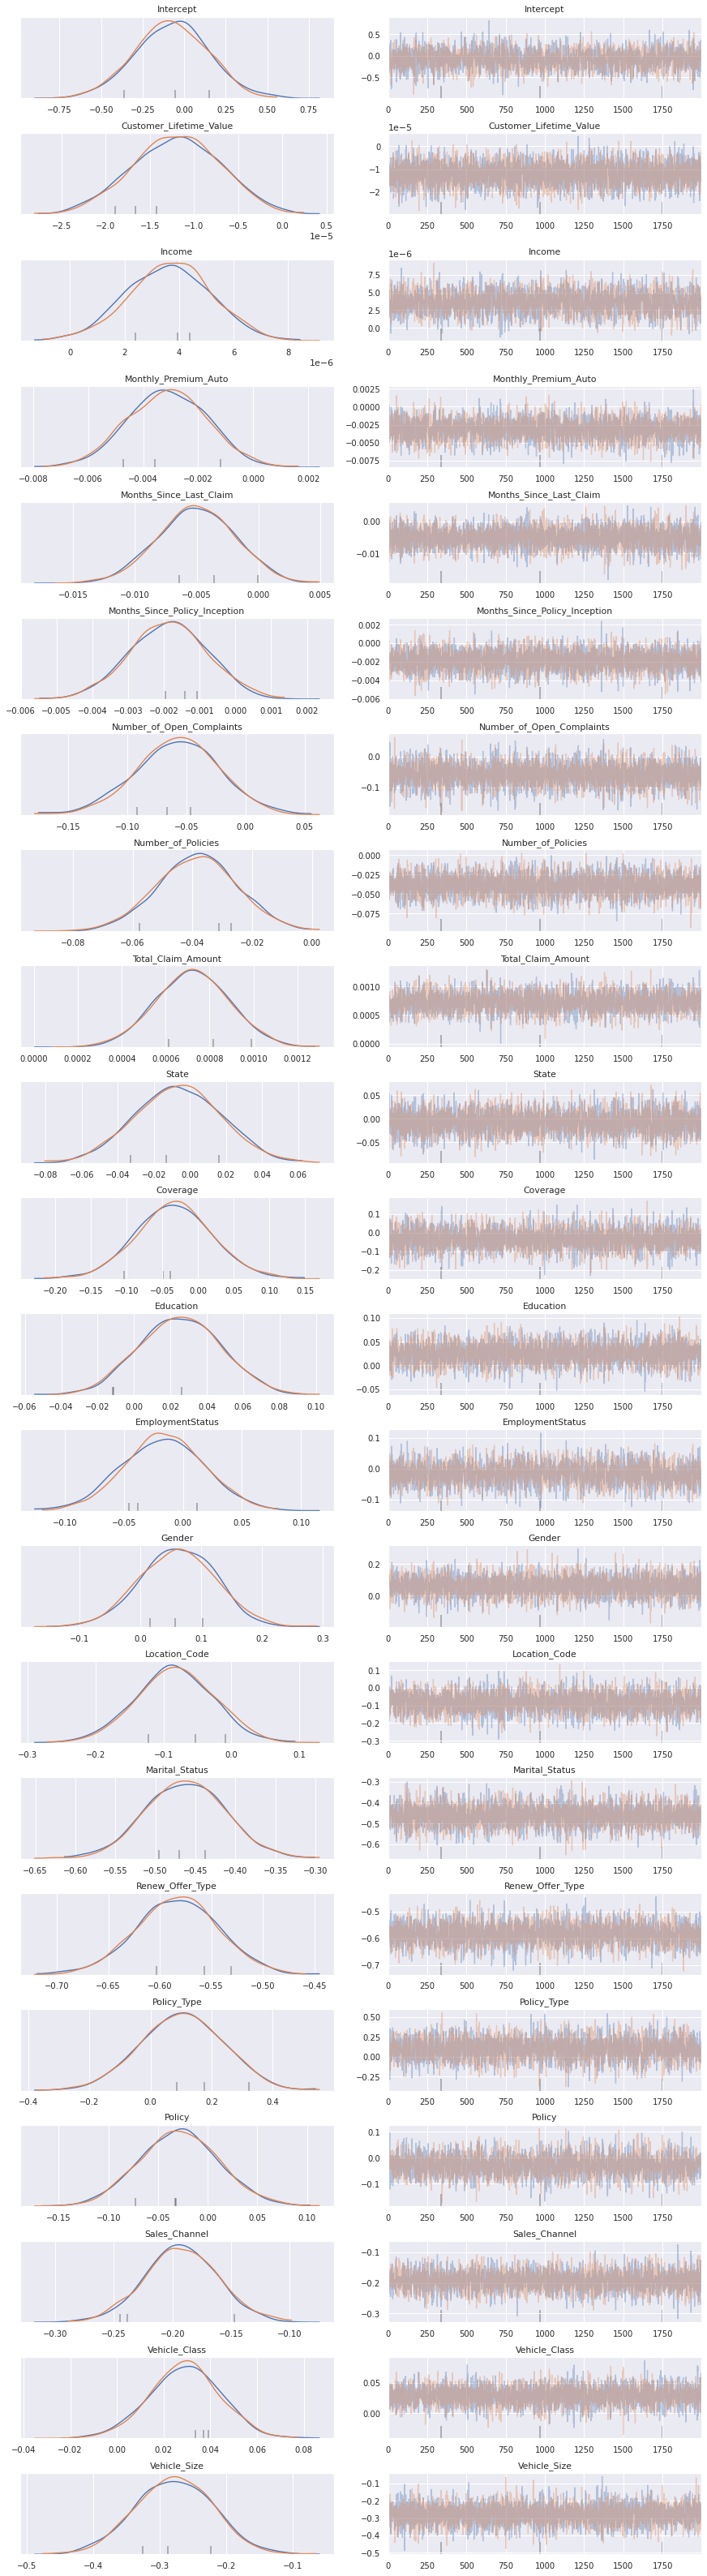

In [0]:
az.plot_trace(trace);

In [0]:
def lm_full(trace, Customer_Lifetime_Value, Sales Channel, Education):
    shape = np.broadcast(Customer_Lifetime_Value, EmploymentStatus, Education).shape
    x_norm = np.asarray([np.broadcast_to(x, shape) for x in [Customer_Lifetime_Value/1000, EmploymentStatus, Education]])
    
    return 1 / (1 + np.exp(-(trace['Intercept'] + 
                             trace['Customer_Lifetime_Value']*x_norm[0] + 
                             trace['EmploymentStatus']*x_norm[1] +
                             trace['Education']*x_norm[2])))

lm = lambda x, samples: lm_full(samples, x, 1., 4.)
lm2 = lambda x, samples: lm_full(samples, x, 5., 4.)
lm3 = lambda x, samples: lm_full(samples, x, 8., 4.)

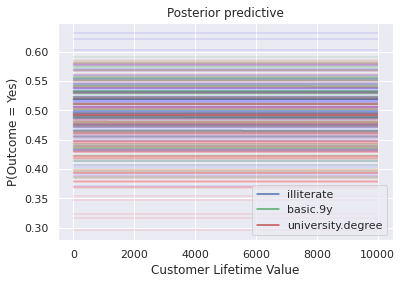

In [0]:
pm.plot_posterior_predictive_glm(trace, eval=np.linspace(0,10000,1000), lm=lm, samples=100, color='blue', alpha=.8)
pm.plot_posterior_predictive_glm(trace, eval=np.linspace(0,10000,1000), lm=lm2, samples=100, color='green', alpha=.8)
pm.plot_posterior_predictive_glm(trace, eval=np.linspace(0,10000,1000), lm=lm3, samples=100, color='red', alpha=.8)

blue_line = mlines.Line2D(['lm'], [], color='b', label='illiterate')
green_line = mlines.Line2D(['lm2'], [], color='g', label='basic.9y') 
red_line = mlines.Line2D(['lm3'], [], color='r', label='university.degree')
plt.legend(handles=[blue_line, green_line, red_line], loc='lower right')
plt.ylabel("P(Outcome = Yes)")
plt.xlabel("Customer Lifetime Value")
plt.show();

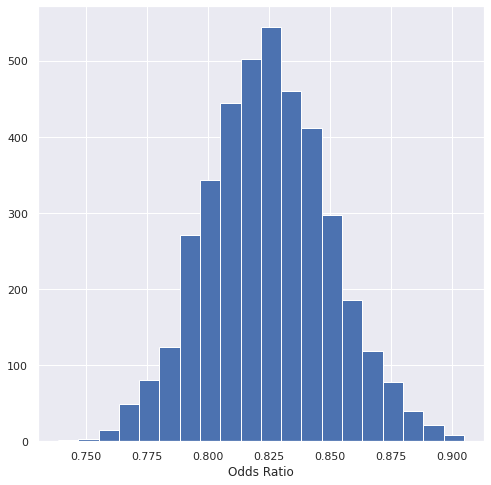

In [0]:
b = trace['Sales_Channel']
plt.hist(np.exp(b), bins=20)
plt.xlabel("Odds Ratio")
plt.show();

In [0]:
lb, ub = np.percentile(b, 2.5), np.percentile(b, 97.5)
print("P(%.3f < Odds Ratio < %.3f) = 0.95" % (np.exp(lb), np.exp(ub)))

P(0.776 < Odds Ratio < 0.876) = 0.95


In [0]:
stat_df = pm.summary(trace)
stat_df['odds_ratio'] = np.exp(stat_df['mean'])
stat_df['percentage_effect'] = 100 * (stat_df['odds_ratio'] - 1)
stat_df

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat,odds_ratio,percentage_effect
Intercept,-0.079,0.218,-0.509,0.310,0.005,0.003,2109.0,2063.0,2108.0,2349.0,1.0,0.924040,-7.596008
Customer_Lifetime_Value,-0.000,0.000,-0.000,-0.000,0.000,0.000,5119.0,4666.0,5084.0,3001.0,1.0,1.000000,0.000000
Income,0.000,0.000,0.000,0.000,0.000,0.000,2448.0,2448.0,2456.0,2295.0,1.0,1.000000,0.000000
Monthly_Premium_Auto,-0.003,0.001,-0.006,-0.000,0.000,0.000,2968.0,2914.0,2973.0,2683.0,1.0,0.997004,-0.299550
Months_Since_Last_Claim,-0.005,0.003,-0.011,0.001,0.000,0.000,5106.0,3346.0,5138.0,2187.0,1.0,0.995012,-0.498752
Months_Since_Policy_Inception,-0.002,0.001,-0.004,0.000,0.000,0.000,5063.0,3643.0,5059.0,2444.0,1.0,0.998002,-0.199800
Number_of_Open_Complaints,-0.058,0.036,-0.126,0.009,0.000,0.000,5146.0,3266.0,5212.0,2553.0,1.0,0.943650,-5.635005
Number_of_Policies,-0.039,0.013,-0.063,-0.012,0.000,0.000,4741.0,4138.0,4758.0,2841.0,1.0,0.961751,-3.824929
Total_Claim_Amount,0.001,0.000,0.000,0.001,0.000,0.000,3520.0,3520.0,3514.0,2943.0,1.0,1.001001,0.100050
State,-0.007,0.024,-0.050,0.037,0.000,0.000,5026.0,1831.0,5031.0,2991.0,1.0,0.993024,-0.697556


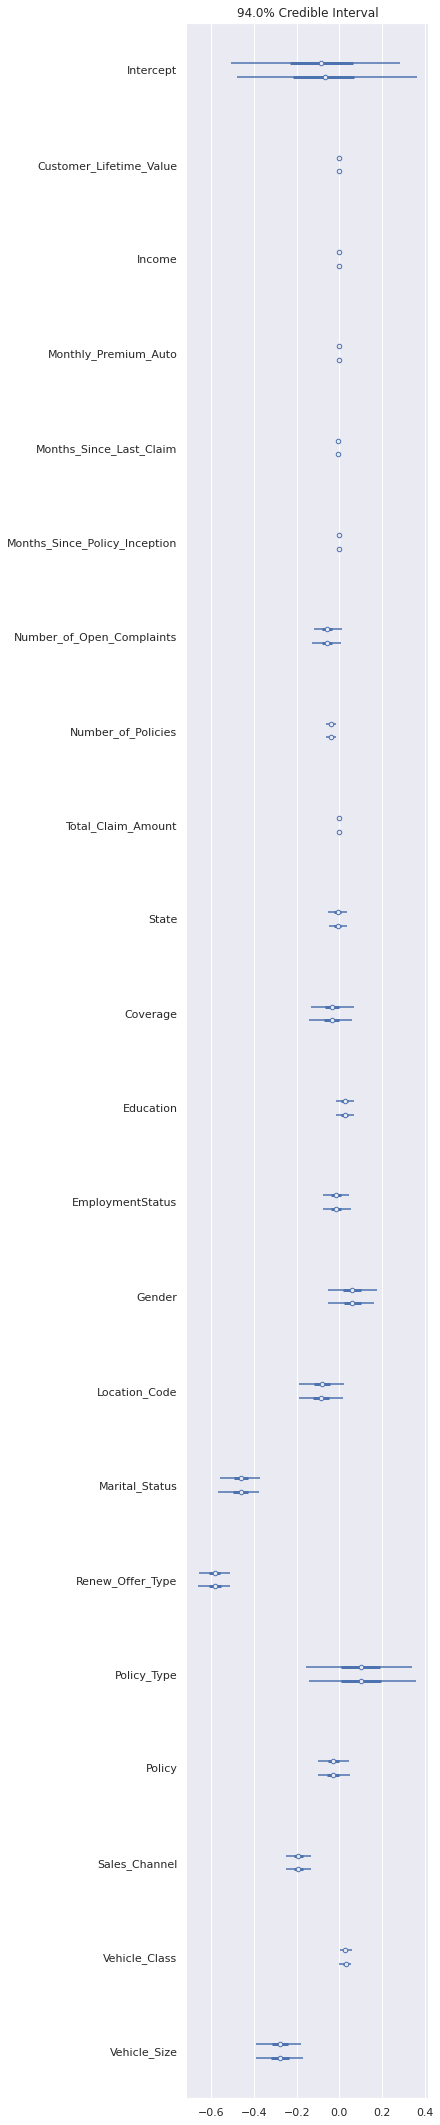

In [0]:
az.plot_forest(trace);

##Posterior Predictive check

In [0]:
ppc = pm.sample_posterior_predictive(trace, model=logistic_model, samples=500)

In [0]:
preds = np.rint(ppc['y'].mean(axis=0)).astype('int')

In [0]:
ppc['y'].mean(axis=0)

array([0.292, 0.054, 0.292, ..., 0.168, 0.108, 0.02 ])

In [0]:
def plot_confusion_matrix(cm, classes = ['No Response', 'Response'],
                          title='Subscription Confusion matrix',
                          cmap=plt.cm.Reds):
    
    # Display the matrix in text form
    print('Confusion matrix')
    print(cm)
    figsize(8, 8)
    
    # Show the matrix using the imshow functionality
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 20)
    
    # Tick marks show classes
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 12)
    plt.yticks(tick_marks, classes, rotation = 90, size = 12)

    # Formatting for text labels on plot
    fmt1 = 's'
    fmt2 = 'd'
    thresh = cm.max() / 2.
    
    # Four types of classifications
    types = [['True Negative', 'False Positive'],
             ['False Negative', 'True Positive']]
    
    # Add the actual numbers and the types onto the heatmap plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i - 0.05, format(types[i][j], fmt1),
                 horizontalalignment="center", size = 18,
                 color="white" if cm[i, j] > thresh else "black")
        
        plt.text(j, i + 0.15, format(cm[i, j], fmt2),
                 horizontalalignment="center", size = 24,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size = 16)
    plt.xlabel('Predicted Label', size = 16)

Confusion matrix
[[7824    2]
 [1307    1]]


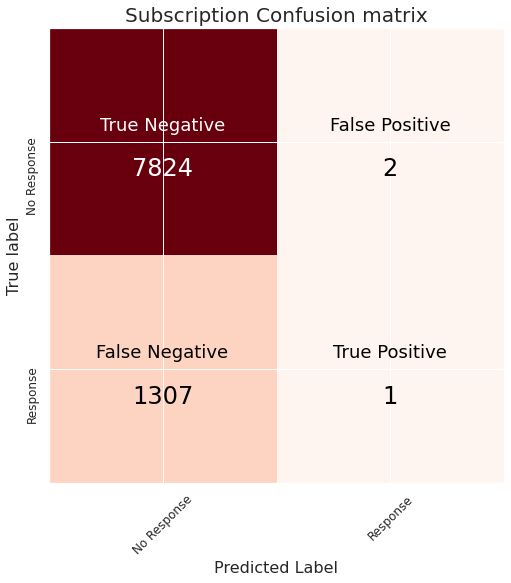

In [0]:
cm = confusion_matrix(all_data_df['Response_bin'], preds)
plot_confusion_matrix(cm)

In [0]:
print('Accuracy of the full model: ', accuracy_score(preds, data['outcome']))
print('f1 score of the full model: ', f1_score(preds, data['outcome']))

Accuracy of the full model:  0.8566892927523538
f1 score of the full model:  0.0015255530129672007


In [1]:
print('Accuracy of the full model: ', accuracy_score(preds, data['outcome']))
print('f1 score of the full model: ', f1_score(preds, data['outcome']))

NameError: ignored